<a href="https://colab.research.google.com/github/Navneet2409/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


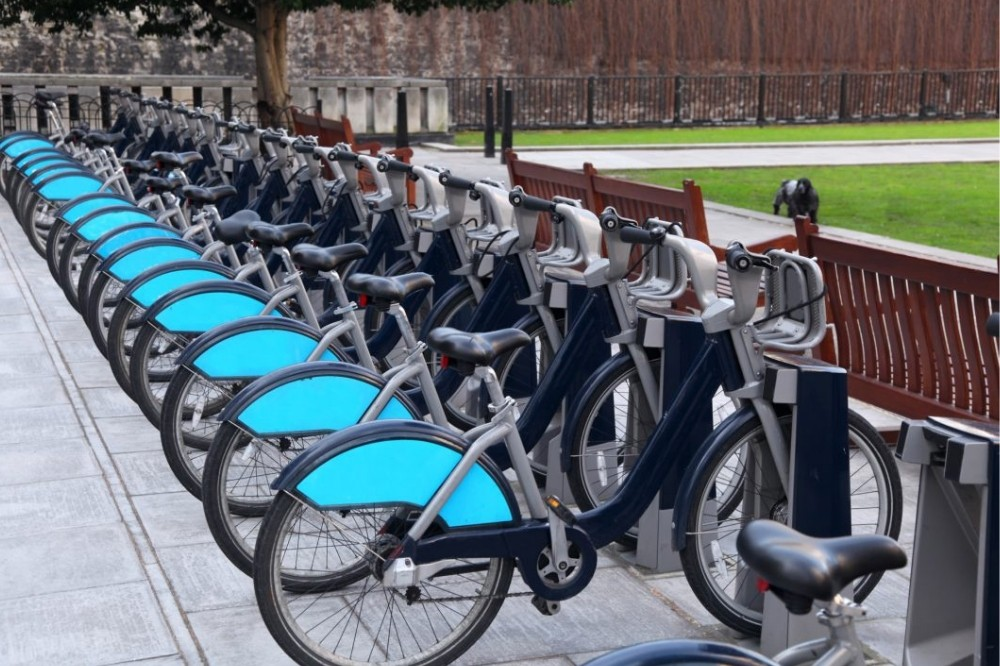

# **GitHub Link -**

https://github.com/Navneet2409/bike-sharing-demand-prediction

# **Project Summary -**

This project is about the use of bike rentals in metropolitan areas as a way to improve mobility and convenience for the public. The challenge is to ensure a consistent supply of bikes for rental. The bike-sharing systems are automated and allow individuals to rent and return bikes at different locations. The project focuses on predicting the demand for the bike-sharing program in Seoul using historical data on factors such as temperature and time.

* There were approximately 7787 records and 11 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Training
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

A growing number of metropolitan areas are now offering bike rentals as a means of enhancing mobility convenience. The public must have access to the rental bike at the appropriate time so that it reduces the amount of time people have to wait. Providing the city with a consistent supply of rental bikes becomes a major concern at some point. The most important part is the expected hourly bicycle count for the constant supply of rental bicycles.


The membership, rental, and bike return procedures in a city are all automated by a network of locations in bike-sharing systems. Through these Bike Sharing systems, individuals can rent bikes from one location and return them to another or the same location as needed. A bicycle can be rented out to individuals through membership or upon request. This procedure is overseen by a citywide network of automated stores.


In this dataset, we predict the demand for the Bike Sharing Program in Seoul based on historical usage patterns about temperature, time, and other data.

### **Motivation** : -  

Predicting how many bikes will be needed at any given time and day is one of the most important business issues. Having fewer bikes wastes resources (both in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes results in revenue loss—ranging from a short-term loss due to the loss of immediate customers to a potential longer-term loss due to the loss of future customer base. Therefore, these businesses would be able to function effectively if they had an estimate of the demands.

## **2. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process 
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [3]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
# load the Seol bike data set from the drive
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Bike Sharing Demand Prediction - Navneet Keshri/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [5]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns Count

In [6]:
# Dataset Rows & Columns 
bike_df.shape

(8760, 14)

In [7]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


### Dataset Information

In [8]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [9]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate entries in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [10]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


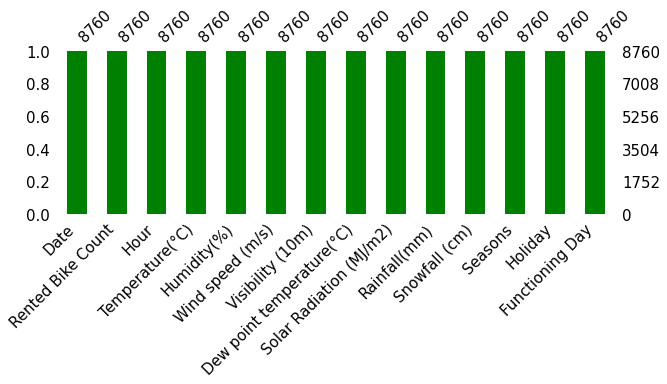

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

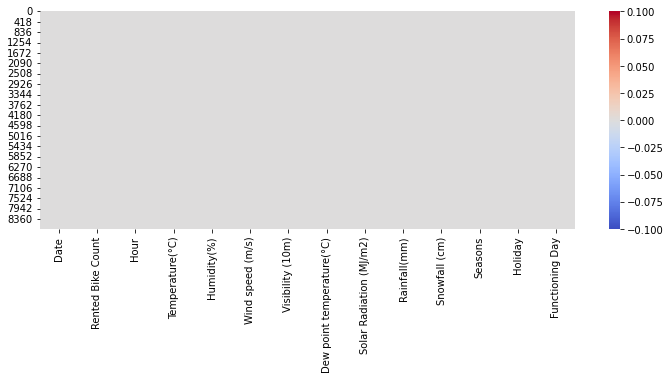

In [12]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 number of rows null values. This seems to be clean data and there is no missing data in any of the 'rows and columns'.

### What did you know about your dataset?

The aforementioned dataset has 14 columns and 8760 rows. The dataset does not contain any duplicate or missing values.

We have to forecast the demand for bike-sharing using the provided dataset, which comes from the market for bike-sharing services.

Analytical studies on the likelihood of a customer seeking bike sharing are known as demand prediction. The objective is to comprehend and manage demand and supply equilibrium throughout the day.


## **3. Understanding Your Variables**

###  Columns

In [53]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###  Statistical Summary

In [54]:
# Dataset Describe
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


###  Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, 
Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Unique Values

In [55]:
# print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [56]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


### Observations: 

* We are focusing on several key columns of our dataset, including  'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons', as they contain a wealth of information.
* By utilizing these features, we plan to create a regression model and implement various regression algorithms. 
* There is a column 'Hour' which might be considered a categorical feature or maybe a numerical feature based on the data we will try both and see the result difference.

## **4. EDA**

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


### **4.1 Creating Some New Features**

In [57]:
# Renaming complex columns name for the sake of simplicity    **(Not a necessary step to do)**
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

##### Breaking down date column

In [58]:
# Splitting Date into year, month, day & day_name
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()

# droping Date column
bike_df.drop('date', axis=1, inplace=True)

In [59]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The hours of the day have a clear sequence - 9 am is closer to 10 am than it is to 8 am and it is farther from 6 pm. It is most accurately classified as a discrete ordinal variable. We will treat hour as a categorical value and will switch to numerical and see the result difference.

In [60]:
def session(x):
   
    ''' 
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column. 
    This conversion is not necessary for model training.
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
bike_df['session'] = bike_df['hour'].apply(session)

### **4.2 Column: 'rented_bike_count'**

In [61]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


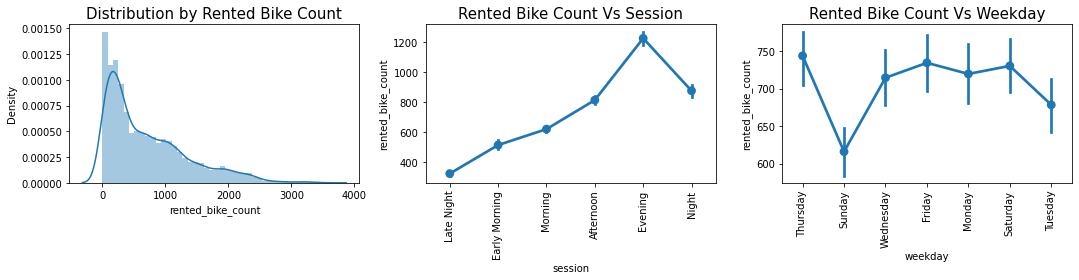

In [62]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Distribution analysis
dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)

# Bi-variate analysis
# Rented Bike Count Vs Session
point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(point.get_xticklabels(), rotation=90)

# Bi-variate analysis
# Rented Bike Count Vs Weekday
point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)
# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:** 
* Distribution of Rented Bike Count is positively skewed and it has a lot of outlier. We will treat it later.
* Demand for rented bike increases in the evening.
* There is least demand for rented bike on Sunday.

### **4.3 Column: 'hour'**

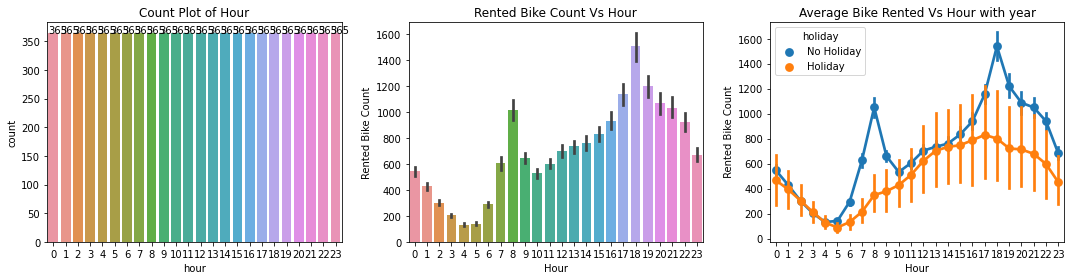

In [63]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

**Observation:** 
* Every hour has equal number of counts in dataset. 
* Demand of rented bike count is higher at 8 AM and 6 PM indicating a high demand at business hours.
* Rented Bike Count follows 2 patterns one for holiday and another for no holiday. 
* Holiday: The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to working local bikers who typically go to work on the working day which is Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

### **4.4 Column: 'temperature'**

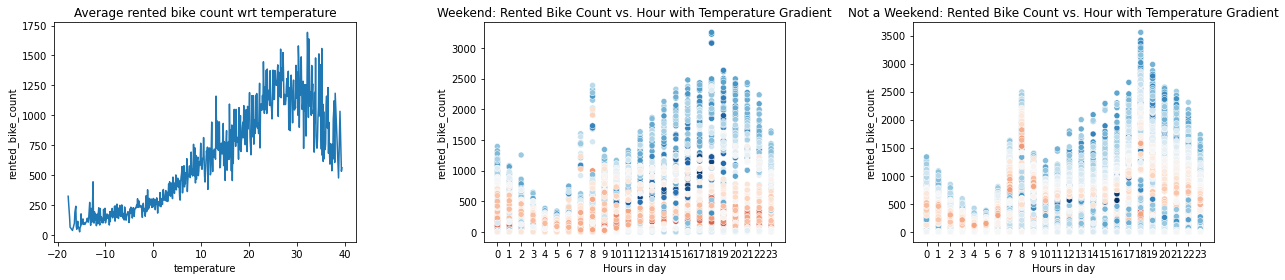

In [64]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

# Univariate analysis
# Dependent Column Value Vs temperature
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')

# Multi-variate analysis
# Dependent Column Value Vs hour with temperature
bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]

# Weekend
scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

# Not a Weekend
scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')


plt.tight_layout()
plt.show()

**Observation:**
* We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.
* People prefer renting bikes in warm environments. Therefore, the demand for bicycles will be high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.
* However, there is a slight decrease in count if the temperature is too high (darkest of the blue dots).

### **4.5 Column: 'humidity'**

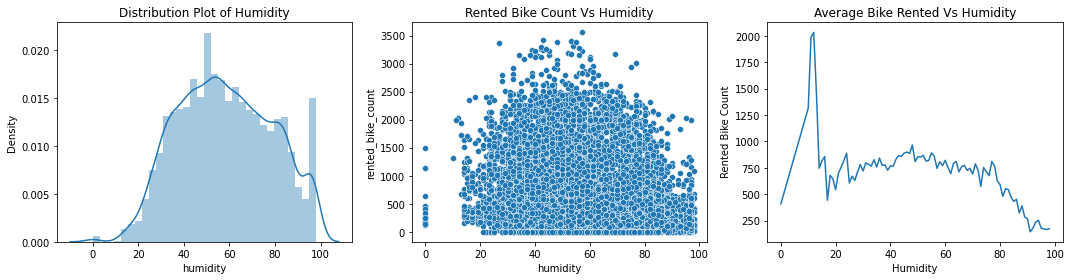

In [65]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

# Bi-variate analysis 
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

# Line Plot
group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the plots above that the average number of bikes rented goes up and down sharply with peak is at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

### **4.6 Column: 'wind_speed'**

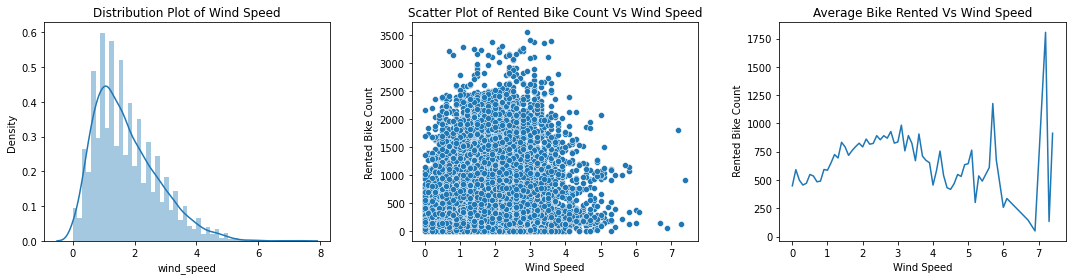

In [66]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

# Bi-variate analysis 
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from distribution plot that wind speed is slighly positively skewed.
* Scatter Plot tells us about the distribution of the wind speed and rented bike count, and how the values of the two variables are related to each other.
* Line plot tells us that people prefer moderate wind but there is an spike at wind speed 7.

### **4.7 Column: 'visibility'**

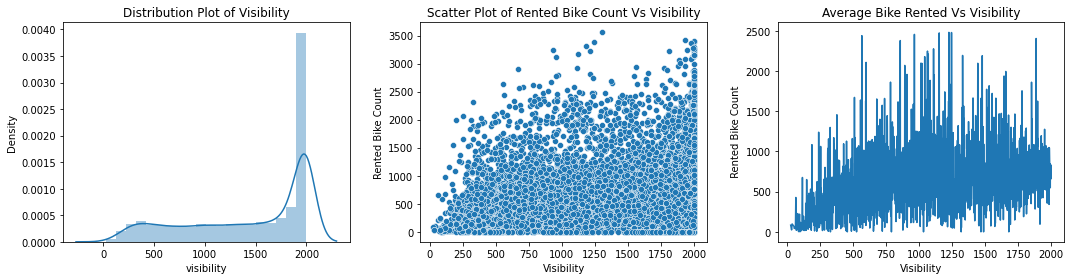

In [67]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis 
# Rented Bike Count Vs Visibility
scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()


**Observation:**
* Visibility is highly skewed to left side.
* We can see from these plots above that as visibility rises, so does rented_bike_count.

### **4.8 Column: 'dew_point_temperature'**

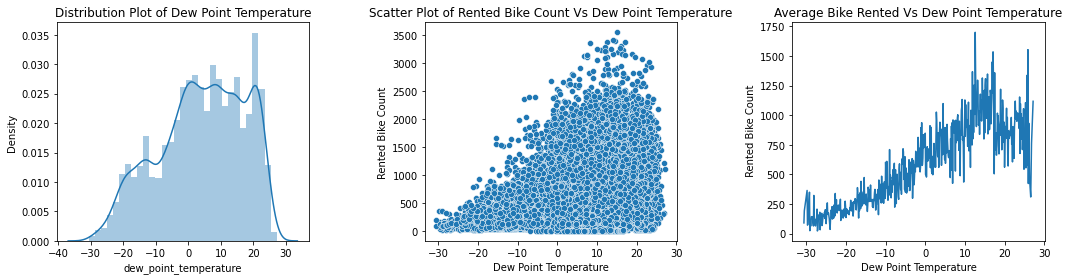

In [68]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis 
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from above plots that dew point temperature is negatively skewed with a clear positive relationship with rented bike count.
* The average number of bikes rented with dew point temperature increases steadily, with a slight decrease at the highest dew point temperature.
* Line plot of dew point temperature is very similar to temperature pattern.

### **4.9 Column: 'solar_radiation'**

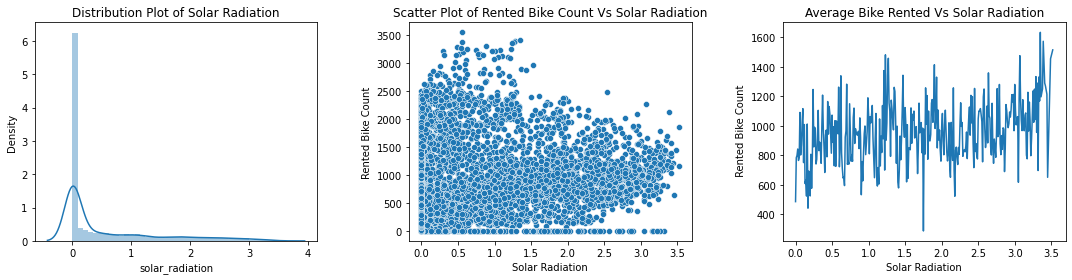

In [69]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.solar_radiation, ax = ax[0])
dist.set_title('Distribution Plot of Solar Radiation')

# Bi-variate analysis 
# Rented Bike Count Vs Solar Radiation
scatter = sns.scatterplot(data=bike_df, x='solar_radiation', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that solar radiation is highly skewed to positive.
* The average number of bikes rented goes up with solar radiation. 
* Additionally, this column is directly related to the temperature column.

### **4.10 Column: 'rainfall'**

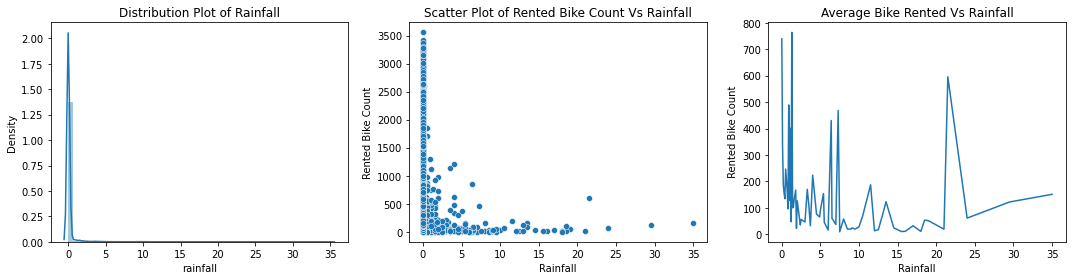

In [70]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis 
# Rented Bike Count Vs Rainfall
scatter = sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of rainfall is highly skewed to positive side.
* People prefer almost no or very less rainfall.

### **4.11 Column: 'snowfall'**

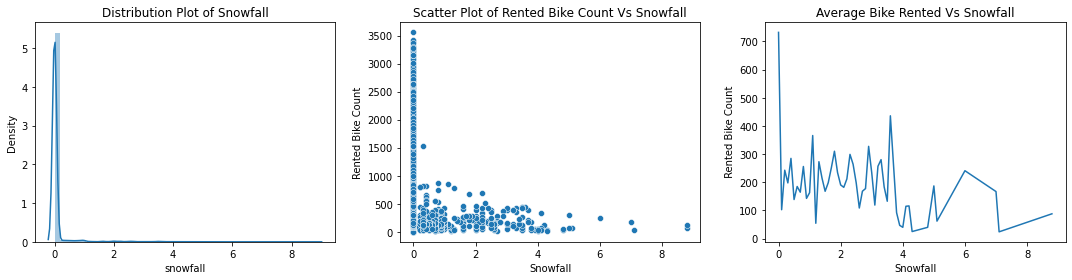

In [71]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis 
# Rented Bike Count Vs Snowfall
scatter = sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of snowfall is highly skewed to positive side.
* People prefer almost no or very less snowfall.

### **4.12 Column: 'seasons'**

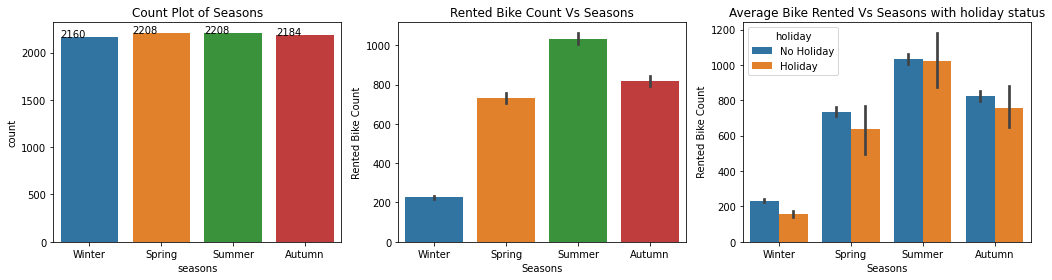

In [72]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='seasons', ax=ax[0])
count.set_title('Count Plot of Seasons')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Seasons
bar = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', hue='holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has 4 seasons and every seasons has more than 2000 counts.
* The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
* In every season on a no holiday rented_bike_count has more number of count than on a holiday.

### **4.13 Column: 'holiday'**

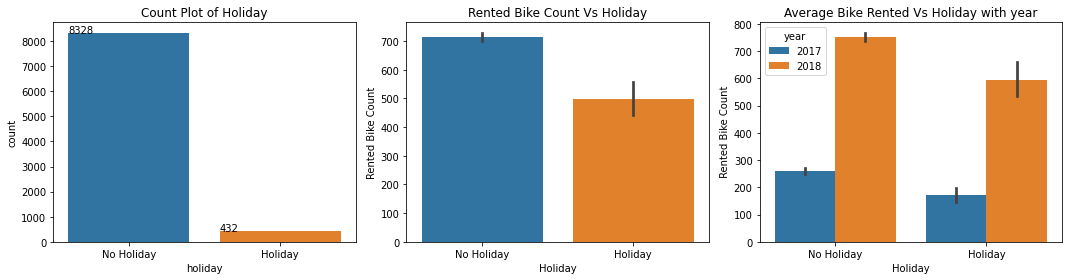

In [73]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax= ax[2])
cat.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of No holiday than holiday which is obvious as most of the days are working days.
* When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.
* Dataset has more records of 2018 than 2017.

### **4.14 Column: 'functioning_day'**

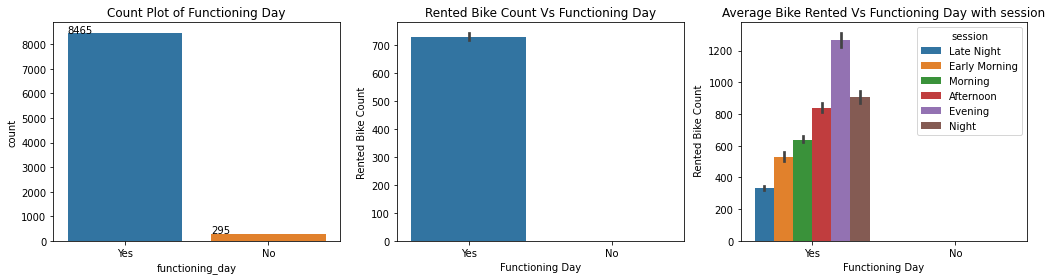

In [74]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='functioning_day', ax=ax[0])
count.set_title('Count Plot of Functioning Day')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', hue='session', ax= ax[2])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Functioning Day with session')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.
* Even though we have some counts of no functioning day still there is no bike rented on a no functioning day.
* On a functioning day, evening session has most number of rented bike count.

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [75]:
# counting duplicate values
bike_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **5.2 Missing Values**

In [76]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
session                  0
dtype: int64


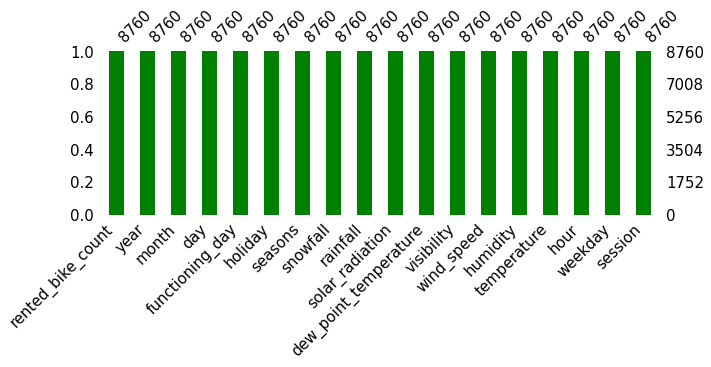

In [77]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

Fortunately there is no missing value in the dataset

### **5.3 Skewness**

In [78]:
# statistical summary
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rented_bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

In [79]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in bike_df.columns:  
  if bike_df[col].nunique() > 35:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Categorical Features : ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday', 'session']


In [80]:
# we do not want any transformation and outlier removal from our target variable as it is possible to have outlier is Seoul Environment
numerical_features.remove('rented_bike_count')
numerical_features.remove('rainfall')
numerical_features.remove('snowfall')


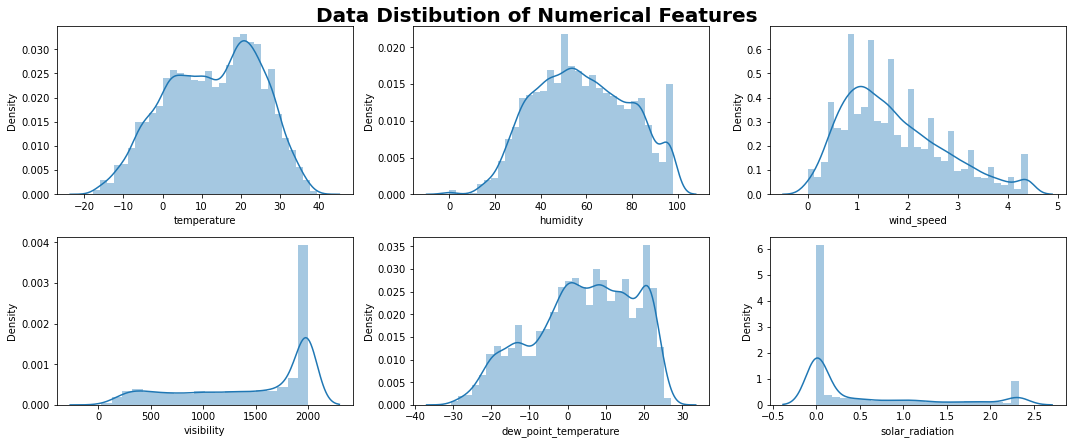

In [87]:
# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                       # subplots 2 rows, 3 columns

  # dist plots
  sns.distplot(bike_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

**Observation:**

* For numerical features, we can see that the majority of distributions are right-skewed. The distribution of rainfall, snowfall, solar radiation is highly skewed to the right. It demonstrates that these columns has many outliers. Some columns are negatively skewed.
* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

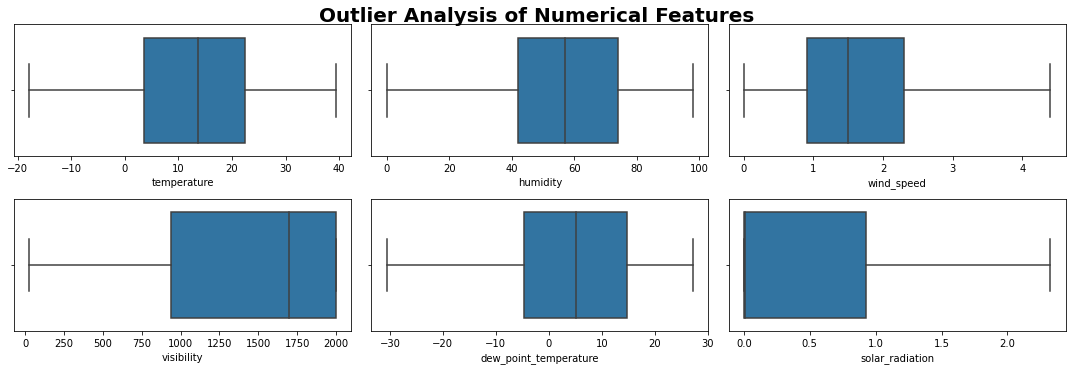

In [88]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:** 
* Outliers are visible in the 'wind_speed', and 'solar_radiation' columns.

* Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [89]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(bike_df):
    for col in bike_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [90]:
# using the function to treat outliers
bike_df = clip_outliers(bike_df)

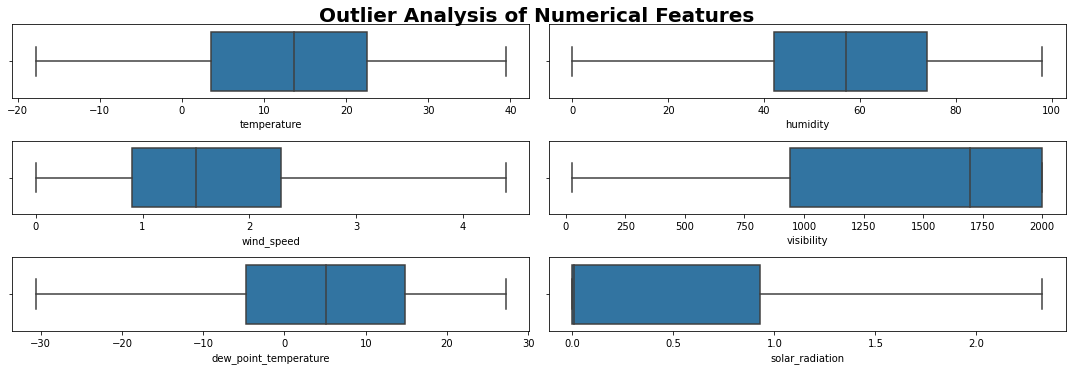

In [91]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)            # subplot of 3 rows and 2 columns

  # countplot
  sns.boxplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

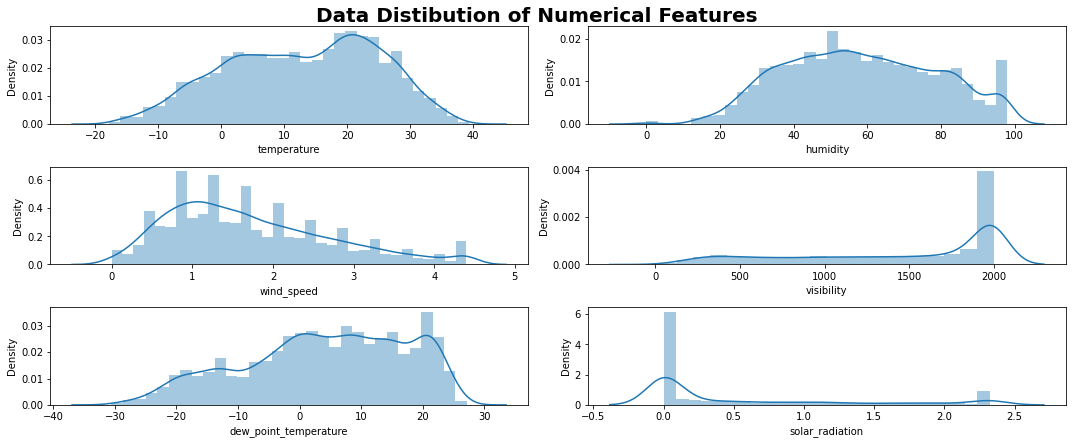

In [92]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)                       # subplots 3 rows, 2 columns

  # dist plots
  sns.distplot(bike_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

* We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

## **6. Feature Engineering**

* Feature engineering is the process of creating new features from existing ones to improve the performance of a machine learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data, or selecting only the most relevant features from the raw data. 
* The goal of feature engineering is to extract relevant information from the raw data and represent it in a way that can be easily understood by the machine learning model. The success of a machine learning model depends heavily on the quality of the features used as inputs, so feature engineering plays an important role in model performance.

### **6.1 Feature Selection**

Feature selection is a technique in machine learning where you select a subset of the most important features from a larger set of features to use as inputs for a model. The goal of feature selection is to reduce the number of features used in the model, while retaining the most important and relevant information from the data.

#### **6.1.1 Correlation Coefficient and Heatmap**

* The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

* The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

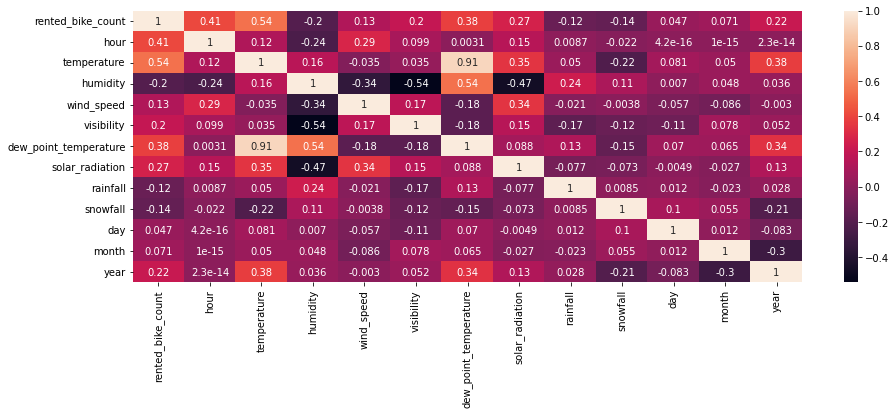

In [93]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(bike_df.corr(), annot=True)     

In [94]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [95]:
# checking the highly correlated features
correlation(bike_df, 0.7)          # setting threshold of 0.7

{'dew_point_temperature'}

##### **4.4.1 Regression plot between target variable and numerical features**

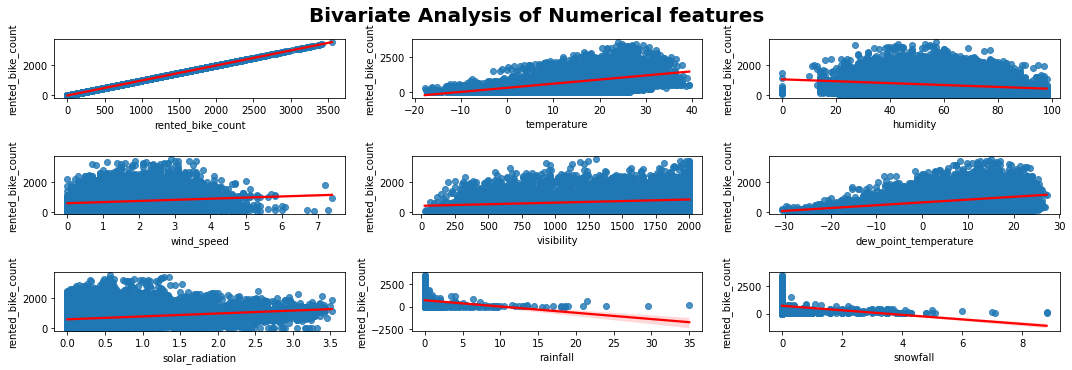

In [ ]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 3, i+1)                     # subplots of 3 rows and 3 columns

  # regression plots
  sns.regplot(x=bike_df[col], y='rented_bike_count', data=bike_df, line_kws={"color":"r"})
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

#### Categorical data conversion

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   int64  
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   object 
 12  functioning_day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend                8760 non-null   int64  
dtypes: f

In [ ]:
# let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   rented_bike_count      8760 non-null   int64   
 1   hour                   8760 non-null   category
 2   temperature            8760 non-null   float64 
 3   humidity               8760 non-null   int64   
 4   wind_speed             8760 non-null   float64 
 5   visibility             8760 non-null   int64   
 6   dew_point_temperature  8760 non-null   float64 
 7   solar_radiation        8760 non-null   float64 
 8   rainfall               8760 non-null   float64 
 9   snowfall               8760 non-null   float64 
 10  seasons                8760 non-null   category
 11  holiday                8760 non-null   category
 12  functioning_day        8760 non-null   category
 13  month                  8760 non-null   category
 14  weekend                8760 non-null   c

#### Manipulations done and insights found

* We did some basic data manipulations and renamed complex column names. 
* We checked for missing and duplicate values.
* We extracted and created 3 columns from the date which are year, month, and day. 
* From the day column, we created the weekend column to better understand the weekend demand of bike sharing count.
* We also changed the data type of the variables and converted a few variables into categorical columns which are necessary for the model to understand. We have to map them into an integer so that we can pass them into our model which we will do later.
* We will get a clear view of the bike-sharing demand through graphical representations in the next sections


## **5. Outlier Analysis**

#### <b> Z score > 4 Pruning </b>
Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean.

In [ ]:
 # Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

bike_df['count_zscore'] = bike_df.groupby(['hour', 'functioning_day'])['rented_bike_count'].transform(zscore)
outlier_idx = np.abs(bike_df['count_zscore'])>4
outlier_data = bike_df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (1, 16)


,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend,count_zscore
4922,1254,2,20.9,87,1.8,222,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes,6,1,4.577229


Let us prune out this outliers. This could be due to some late night shows or holiday or some party.

In [ ]:
# Removing outliers from my data
bike_df_without_outliers = bike_df.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', bike_df.shape)
print('Shape of data after outlier pruning: ', bike_df_without_outliers.shape)

Shape of data before outliner pruning:  (8760, 16)
Shape of data after outlier pruning:  (8759, 16)


Dropping the Zscore >4 column from the data frame

In [ ]:
# Dropping the zscore column
bike_df_without_outliers = bike_df_without_outliers.drop('count_zscore', axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


#### <b> Correlation Analysis </b>
Regression Plots
* Using seaborn to get regression plots with respect to some features

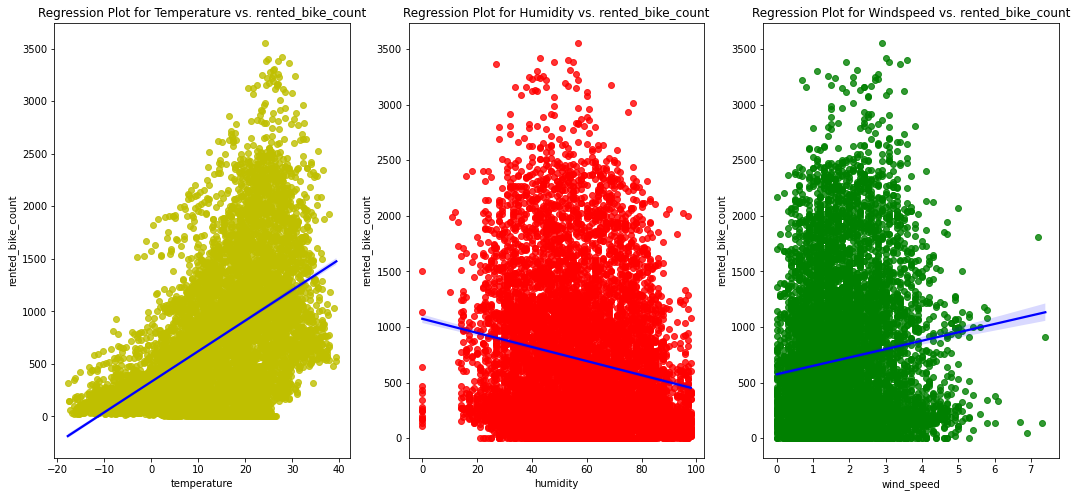

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data =bike_df_without_outliers, x='temperature', y='rented_bike_count',ax=axes,scatter_kws={"color": 'y'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Temperature vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=bike_df_without_outliers, x='humidity', y='rented_bike_count',ax=axes,scatter_kws={"color": 'r'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Humidity vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=bike_df_without_outliers, x='wind_speed', y='rented_bike_count',ax=axes, scatter_kws={"color":'g'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Windspeed vs. rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Seaborn regression plots serve primarily as a visual guide for highlighting patterns in a dataset during exploratory data analyses. Regression plots help to illustrate the linear relationships between two parameters by drawing a regression line between them, as the name suggests.

As a result, I used regression plots to determine the relationship between wind speed, humidity, and temperature.

##### 2. What is/are the insight(s) found from the chart?

The regression plot above shows that rented_bike_count has a positive correlation with temperature and windspeed and a negative correlation with humidity. We will check the relationship of all mathematical factors with one another through Heatmap.

#### <b> Heatmap Plot </b>
Obtaining correlation between the rental of bikes and other numerical features by making use of heatmap plots of all the numerical features

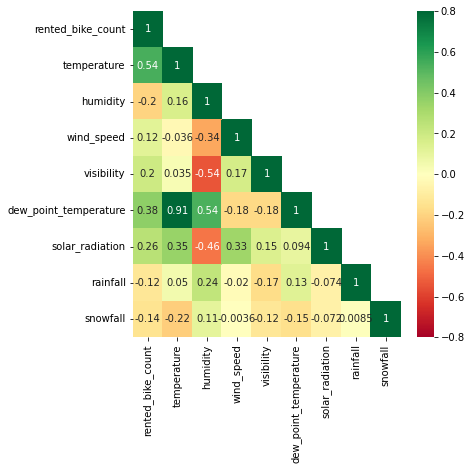

In [ ]:
# Heatmap relative to all numeric columns
corr_matrix = bike_df_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

# Heatmap visualization
fig = plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

##### 1. Why did you pick the specific chart?

A heat map can be used to show density. In addition, it makes it simpler to visualize the relationship between variables and the dependent variable when conducting analysis.

I used a heatmap to determine the linear relationship between all the variables and the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* <b> Very Highly Correlated (0.7 - 0.9) : </b> temperature and dew_point_temperature are very highly correlated as expected.

* <b> Moderately Correlated (0.5 - 0.7) : </b> We see a moderate correlation between humidity and dew_point_temperature and temperature and rented_bike_count. This is probably only true for the range of temperatures provided.
* <b> Negative Correlation (less than 0) :</b> We see a negative correlation between visibility and humidity and solar_radiation and humidity. The more the humidity, the fewer people prefer to bike.
* <b> Low Correlation(near zero):</b> rented_bike_count has a weak dependence on windspeed, snowfall, and rainfall.

## **6. Feature Engineering & Data Pre-processing**

Numerous categorical columns are present. Each important and relevant categorical column will be converted into binary vector columns by us. Later, eliminate all unnecessary columns (redundant or very low correlation).

#### <b>Column transformations need to be done:</b>

* season: month column has a direct mapping with the season (Winter: January to March, Summer: April to June, Autumn: July to September, and Spring: October to December). Hence we will drop the season column.
* holiday and 'day': functioning_day = weekday and not a holiday. Since we noticed that there were two kinds of bike rental behaviors - during functioning days and not a functioning day, we will retain only the working day column and drop the 'day' and 'holiday' column
* functioning_day: After observing the bike rental trend, we propose to build 2 separate models for 1. if it is a weekend, and 2. if it is not a weekend. Hence, we can separate the data based on this column and drop the column.
* temperature: temperature and dew_point_temperature are highly correlated. Hence retain only the temperature column.
* wind speed, rainfall, and snowfall: Very poorly correlated with the count. Hence drop these columns.
* Date: Intuitively, there is should be no dependency on a date. Hence drop this column
* hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.
* month: Split month column to month_1, month_2, ..., month_12. Drop month_12 since it is a function of the rest of the month columns

In [ ]:
# Using numbers to represent categorical data to transform the categorical columns
season_dict = {'Spring':1, 'Summer':2, 'Autumn':3, 'Winter':4}
holiday_dict ={'No Holiday':0, 'Holiday': 1}
functioning_day_dict ={'No':0, 'Yes':1}

bike_df_without_outliers['seasons'] = bike_df_without_outliers['seasons'].map(season_dict)
bike_df_without_outliers['holiday'] = bike_df_without_outliers['holiday'].map(holiday_dict)
bike_df_without_outliers['functioning_day'] = bike_df_without_outliers['functioning_day'].map(functioning_day_dict)
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [ ]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [ ]:
# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with functioning_day, temperature with dew_point_temperature
# or poorly correlated with the target column: windspeed, rainfall and snowfall

to_drop = ['seasons', 'holiday', 'dew_point_temperature', 'wind_speed', 'rainfall', 'snowfall']
bike_df_without_outliers = bike_df_without_outliers.drop(to_drop, axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


####**Categorical Encoding - Transforming all the categorical columns into binary columns...**

In [ ]:
# Transforming all the categorical columns into binary columns
month=pd.get_dummies(bike_df_without_outliers['month'], prefix='month')
hour=pd.get_dummies(bike_df_without_outliers['hour'], prefix='hour')

bike_df_ready=pd.concat([bike_df_without_outliers, month, hour],axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [ ]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)

In [ ]:
# Dropping the last binary vector column 
to_drop2 = ['month_12', 'hour_23']
bike_df_ready = bike_df_ready.drop(to_drop2, axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22'],
      dtype='object')

####**Normalise rented_bike_count (Dependent Variable) column**

##### Which method have you used to scale you data and why?

A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data.

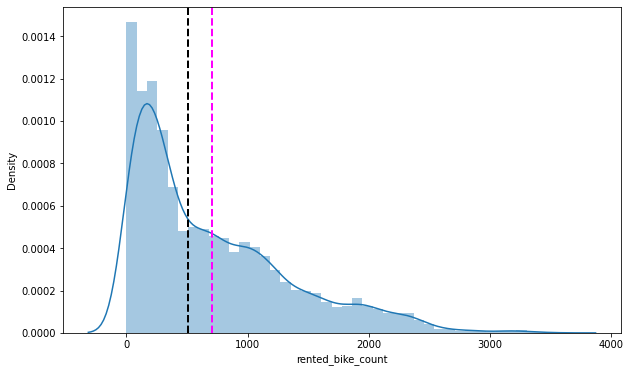

In [ ]:
# Distribution plot of Rented Bike Count
# density plot
plt.figure(figsize=(10,6))
ax=sns.distplot(bike_df_ready['rented_bike_count'],hist=True)
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(bike_df_ready['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df_ready['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Right skewness is moderate in Rented Bike Count, as shown in the graph above. Since "the distribution of the dependent variable has to be normal" is the assumption of linear regression, we should carry out some action to make it normal.

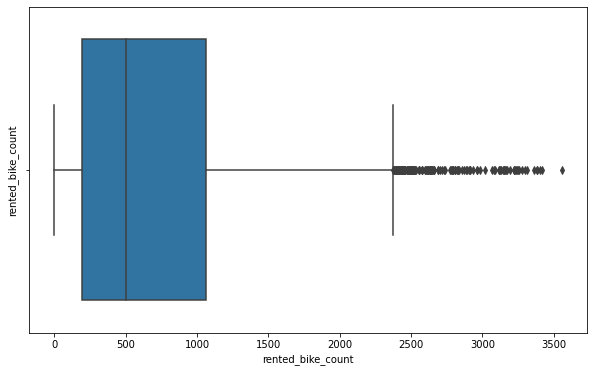

In [ ]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(bike_df_ready['rented_bike_count'])
plt.ylabel('rented_bike_count')
plt.show()

The boxplot above demonstrates that outliers in the rented bike count column have been identified.

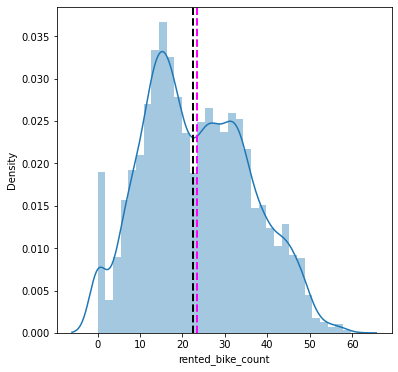

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(6,6))
ax=sns.distplot(np.sqrt(bike_df_ready['rented_bike_count']))
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

After applying square root to the skewed Rented Bike Count, we obtain an almost normal distribution due to the general rule that the skewed variable must be made normal.

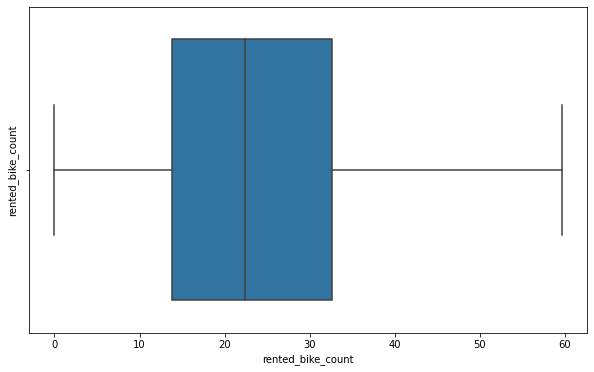

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))
sns.boxplot(x=np.sqrt(bike_df_ready['rented_bike_count']))
plt.ylabel('rented_bike_count')
plt.show()

We find that there are no outliers in the Rented Bike Count column after applying square root.

####**Data Splitting**

<b>Train/Validation/Test Split:</b>

First split the labeled data provided into internal training and testing sets. 



In [ ]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X = bike_df_ready.drop('rented_bike_count', axis=1)
y = np.sqrt(bike_df_ready['rented_bike_count'])

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(f'X_train shape =',X_train.shape)
print(f'X_test shape =',X_test.shape)
print(f'y_train shape =',y_train.shape)
print(f'y_test shape =',y_test.shape)

X_train shape = (6569, 42)
X_test shape = (2190, 42)
y_train shape = (6569,)
y_test shape = (2190,)


##### What data splitting ratio have you used and why? 

There are two issues at stake: Your parameter estimates exhibit greater variance with less training data. Your performance statistic will have greater variance with less testing data. In general, you should focus on dividing the data so that neither the absolute number of instances in each category nor the percentage is too high, which is more important.

If you have a sum of 100 cases, you're presumably staying with cross-approval as no single split will give you good fluctuation in your evaluations. If you have 100,000 instances, it doesn't matter if you split them 80:20 or 90:10 (although you might want to use less training data if your method requires a lot of computational power).

You might be surprised to learn that the 80/20 ratio—also known as the Pareto principle—occurs quite frequently. If you use that ratio, it is usually a safe bet.

The small training dataset in this instance necessitates a 75:25 ratio.

#### **Evaluation Metrics Used -**

* The mean squared error (MSE):- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE):- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE):- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared:- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## **7. ML Model Implementation**

#### **1st Model - Linear Regression**

By fitting a line to the data, regression models describe the relationship between variables. The line used in linear regression models is straight.

The linear approach is used to model the relationship between independent and dependent variables in linear regression. Simply put, it is a line that best fits the values of the independent and dependent variables.

Allow us now to carry out our most memorable model.
Linear Regression from the Scikit library will be used.

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7572206937827596

In [ ]:
#check the coefficeint
reg.coef_

array([ 2.46645627e-01,  5.60119679e-01, -1.43402426e-01,  1.28750500e-03,
        1.22733903e+00,  2.90693362e+01,  7.75745501e+07, -1.24746738e+00,
        8.53320049e+08,  7.75745498e+08,  6.98170951e+08,  6.20596402e+08,
        5.43021854e+08,  4.65447305e+08,  3.87872749e+08,  3.10298196e+08,
        2.32723652e+08,  1.55149105e+08,  7.75745555e+07,  3.97469278e+00,
        1.99081268e+00, -1.04222744e+00, -3.97573113e+00, -6.14697743e+00,
       -5.93076997e+00, -1.27223078e+00,  4.93360906e+00,  1.02438739e+01,
        2.56203247e+00, -2.30238057e+00, -3.00961629e+00, -2.65221900e+00,
       -3.42162218e+00, -3.45517339e+00, -2.81340865e+00, -7.49070450e-01,
        2.62002802e+00,  9.08659345e+00,  5.72296927e+00,  5.46611530e+00,
        4.62620328e+00,  3.75181066e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.49870759231109
RMSE : 6.123618831402808
MAE : 4.631941930070968
R2 : 0.7572206937827596
Adjusted R2 : 0.7524714013462789


Our r2 score appears to be 0.757, indicating that our model can account for the majority of the variance in the data. Let's store it in a dataframe so that we can compare it later.

In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# performance on test dataset
#import the packages
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 39.75328509745072
RMSE : 6.305020626251014
MAE : 4.780139380147357
R2 : 0.7462667990840166
Adjusted R2 : 0.741303224590085


The r2_score for the test set is 0.746. This indicates that our linear model works well with the test data. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter—is present.

In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

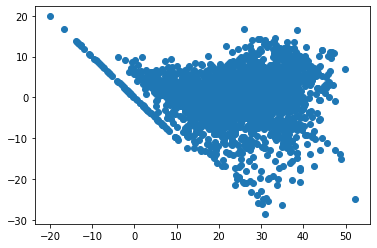

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

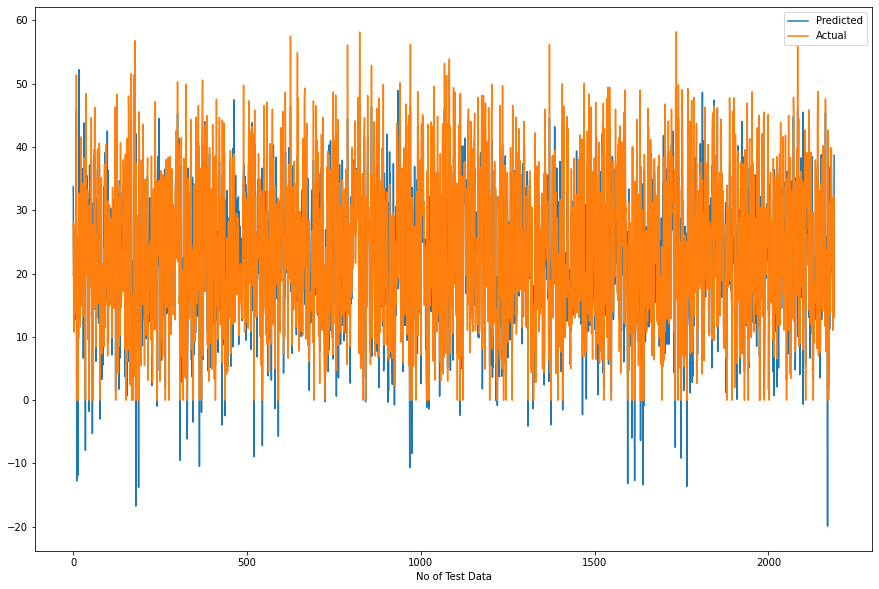

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### **2nd Model -Lasso (Regularization Model)** 

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4531383891444809 0.456976838882418


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 83.87315645584718
RMSE : 9.158228892959992
MAE : 6.791020865571764
R2 : 0.456976838882418
Adjusted R2 : 0.4463541221768109


Our r2 score appears to be 0.456, indicating that our model is unable to account for the majority of the variance in the data. Let's save it in a dataframe so that we can compare it later.

In [ ]:
# storing the value of the test set metrics in a dataframe to compare later
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),2),
       'MSE':round((MSE_l),2),
       'RMSE':round((RMSE_l),2),
       'R2_score':round((r2_l),2),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 85.67875802894649
RMSE : 9.256282084560004
MAE : 6.944204612053192
R2 : 0.4531383891444809
Adjusted R2 : 0.44244058399500175


The test set has an R2 score of 0.45. This indicates that the test data do not support our linear model's predictions. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter is present.

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

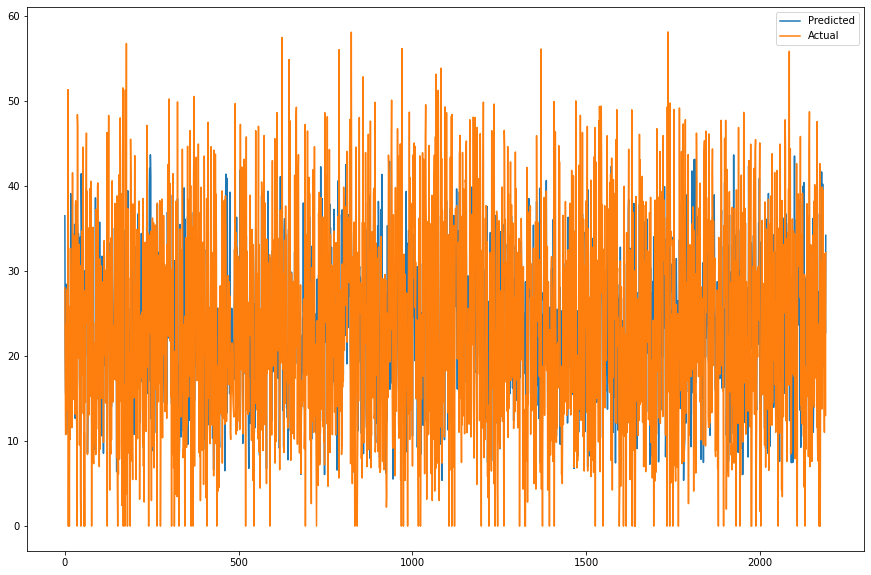

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

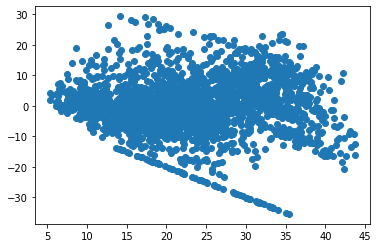

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### **3rd Model -Ridge (Regularization Model)**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
# Fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# check the score
ridge.score(X_train, y_train)

0.7572206057354925

In [ ]:
# get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# import the packages
from sklearn.metrics import r2_score
# calculate R2 and adjusted R2 score
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.49872119173508
RMSE : 6.123619941810161
MAE : 4.632035255522214
R2 : 0.7572206057354925
Adjusted R2 : 0.7524713115766154


Looks like our r2 score value is 0.757 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare later.

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.751795604679025
RMSE : 6.304902505564938
MAE : 4.780231222524114
R2 : 0.7462763060660882
Adjusted R2 : 0.7413129175494491


The r2_score for the test set is 0.746. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

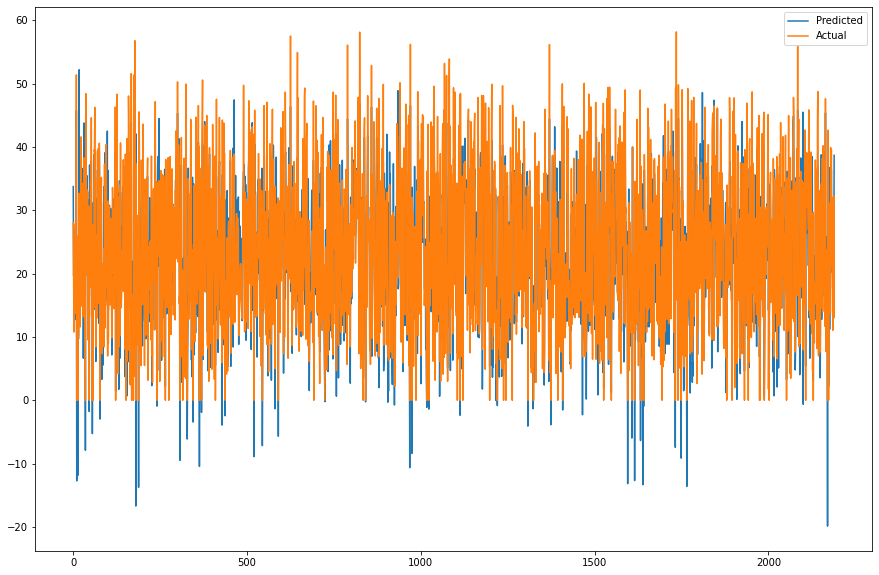

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

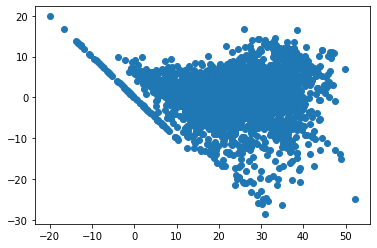

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#### **4th Model -Elastic Net (Regularization Model)**

In [ ]:
# import the packages
from sklearn.linear_model import ElasticNet
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Fit the model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.6279010249947612

In [ ]:
# get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.47289946794181
RMSE : 7.581088277281951
MAE : 5.73828610026378
R2 : 0.6279010249947612
Adjusted R2 : 0.6206219579476164


Looks like our r2 score value is 0.627 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 58.48835705215875
RMSE : 7.647768109204067
MAE : 5.858671650946587
R2 : 0.6266864986181269
Adjusted R2 : 0.6193836727876478


The r2_score for the test set is 0.626. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe to compare it
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

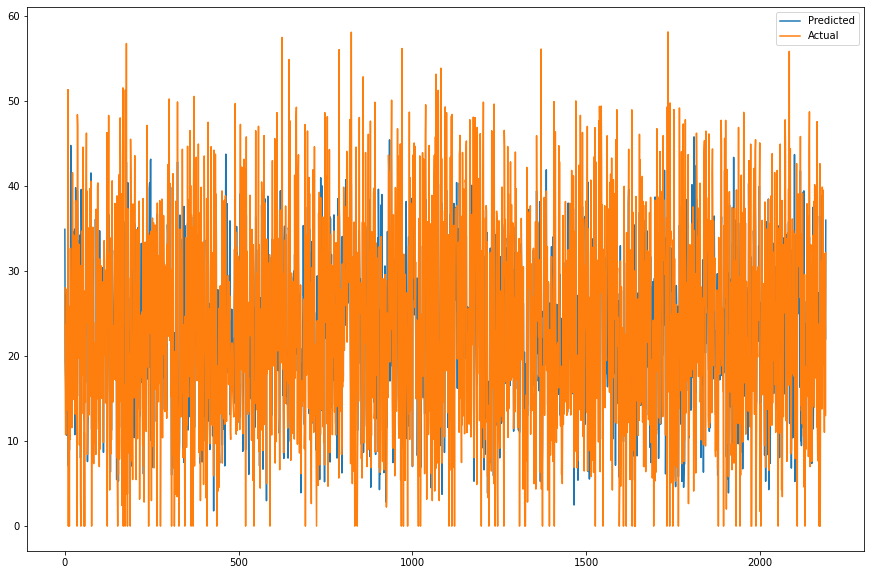

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

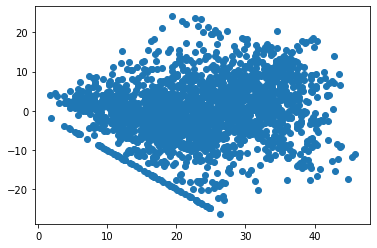

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#### **5th Model - Decision Tree**

In [ ]:
# import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
# get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7435732774773345
MSE : 39.606632198413
RMSE : 6.293380029714796
MAE : 4.52577751410227
R2 : 0.7435732774773345
Adjusted R2 : 0.7385570118294762


Looks like our r2 score value is 0.733 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 45.820490861128704
RMSE : 6.769083457982233
MAE : 4.833090571844648
R2 : 0.7075416588783676
Adjusted R2 : 0.7018205362295048


The r2_score for the test set is 0.718. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),2),
       'MSE':round((MSE_d),2),
       'RMSE':round((RMSE_d),2),
       'R2_score':round((r2_d),2),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

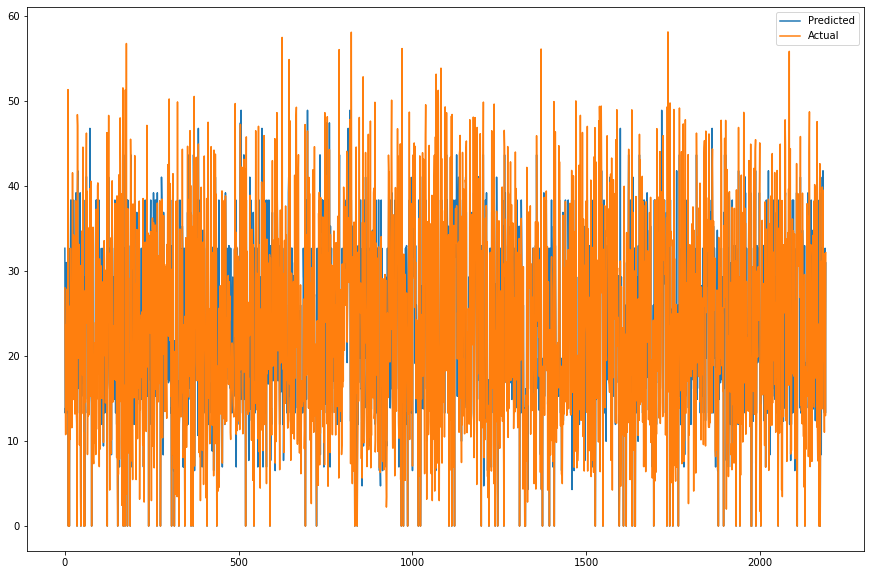

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

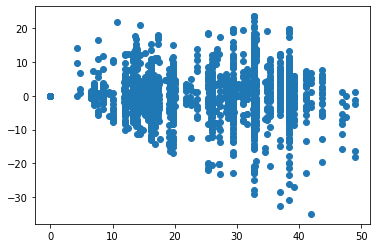

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

#### **6th Model - Random Forest**

In [ ]:
# import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

# calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9882563829622338
MSE : 1.8138714877998239
RMSE : 1.3468004632460682
MAE : 0.8164204669540243
R2 : 0.9882563829622338
Adjusted R2 : 0.9880266522144061


Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.235830578432305
RMSE : 3.497975211237539
MAE : 2.1713307435613927
R2 : 0.9219023924457909
Adjusted R2 : 0.9203746330059787


The r2_score for the test set is 0.922. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

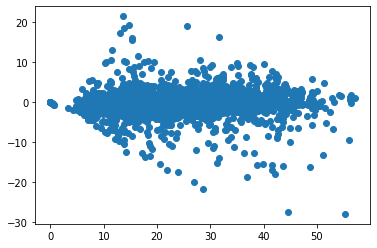

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([2.24658364e-01, 3.06974943e-01, 1.54493543e-01, 1.68950199e-02,
       3.73093905e-02, 1.59724927e-01, 1.93714895e-02, 2.42377685e-02,
       1.44744127e-04, 1.66809471e-04, 2.07797451e-03, 1.12108565e-03,
       1.22661737e-03, 3.23148366e-03, 9.23209579e-04, 2.46294463e-03,
       1.41033868e-03, 1.95253886e-03, 7.95469753e-03, 3.97611574e-04,
       3.28036004e-04, 1.14621703e-03, 6.08489189e-04, 4.30808318e-04,
       4.47978884e-04, 1.17451224e-03, 1.23387755e-03, 1.13885107e-02,
       4.45918531e-04, 9.90670744e-04, 2.99531860e-04, 3.91266954e-04,
       1.46017481e-04, 1.75441189e-04, 4.24921861e-04, 7.98945586e-04,
       1.05132923e-03, 9.23655393e-03, 9.70371135e-04, 4.41528470e-04,
       6.82699180e-04, 4.50872429e-04])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.31
0,hour,0.22
5,functioning_day,0.16
2,humidity,0.15
4,solar_radiation,0.04
3,visibility,0.02
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
# FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

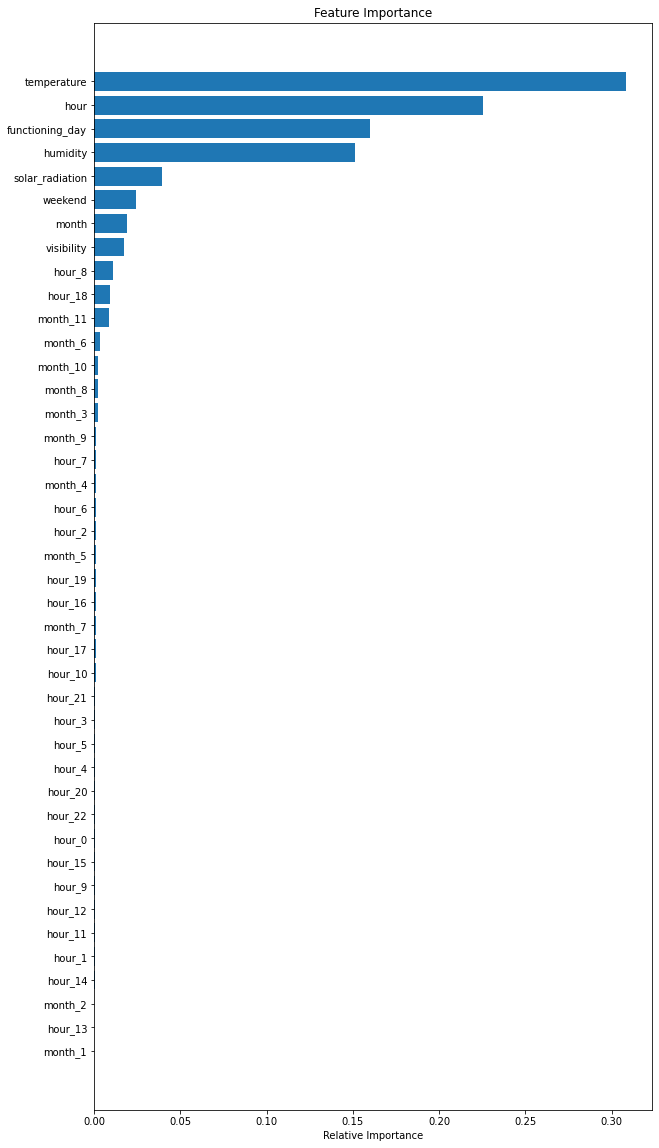

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **7th Model - Gradient Boosting (Ensemble Method)**

In [ ]:
# import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
# calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8943871545179984
MSE : 16.312532037544287
RMSE : 4.038877571497345
MAE : 2.8541015996926724
R2 : 0.8943871545179984
Adjusted R2 : 0.8923211370469951


Looks like our r2 score value is 0.894 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.088279571260106
RMSE : 4.253031809340262
MAE : 3.0709811628901478
R2 : 0.8845479797851137
Adjusted R2 : 0.8822894866090423


The r2_score for the test set is 0.884. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

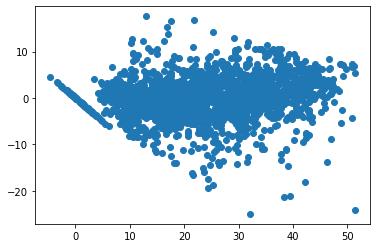

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([2.12907077e-01, 3.20070987e-01, 1.50574303e-01, 1.91370087e-03,
       3.61983615e-02, 1.83237729e-01, 2.05365286e-02, 1.88063821e-02,
       0.00000000e+00, 1.10463629e-04, 3.13943455e-04, 0.00000000e+00,
       3.41013448e-04, 4.12161397e-03, 5.51676228e-04, 2.53306152e-03,
       0.00000000e+00, 3.90493835e-03, 9.91775349e-03, 9.83257590e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74722879e-03,
       2.17936913e-03, 6.12613324e-04, 5.73411578e-04, 1.28526788e-02,
       0.00000000e+00, 1.57327413e-03, 7.41551729e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14569556e-02, 2.40126385e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.21
1,temperature,0.32
2,humidity,0.15
3,visibility,0.00
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.21
5,functioning_day,0.18
2,humidity,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01
18,month_11,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

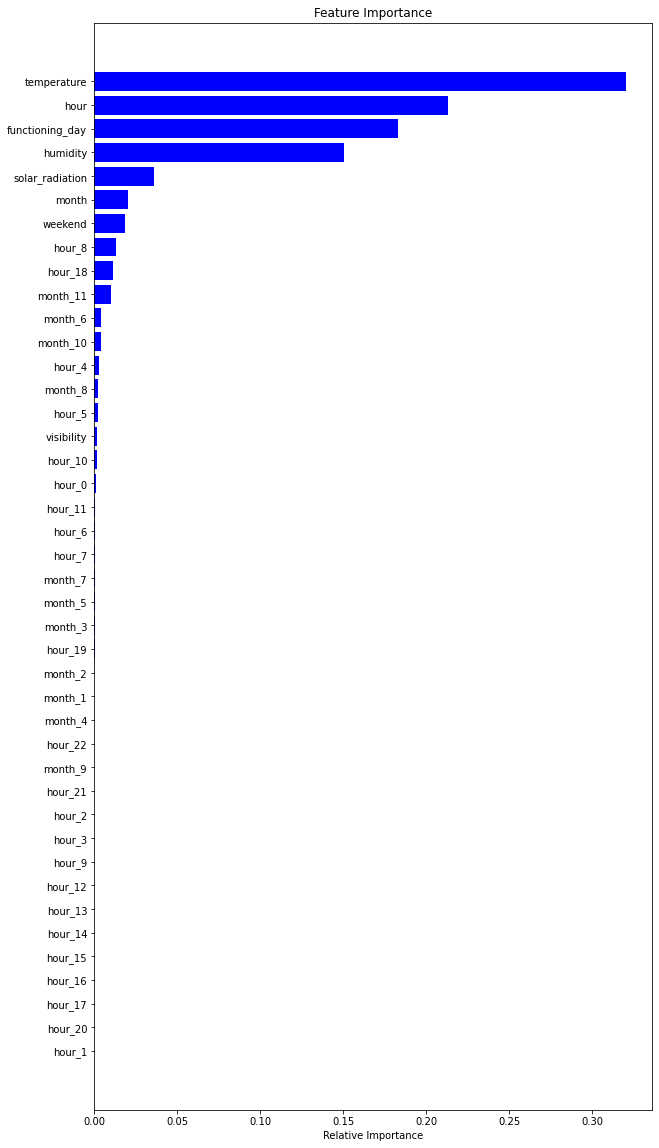

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **8th Model Gradient Boosting Regressor with GridSearchCV**

##### Hyperparameter tuning

Let's try adjusting some hyperparameters to see if our model performs better before moving on to the next models.

The process of selecting the best hyperparameters for a learning algorithm is known as hyperparameter tuning. A model argument is a hyperparameter whose value is set before learning begins. Hyperparameter tuning is the key to machine learning algorithmic success.

##### Using GridSearch CV

GridSearch CV makes it easier to fit the model to the training set by looping through predefined hyperparameters. Thus, in the end, we can select the optimal hyperparameters from the list.

##### Provide the range of values for chosen hyperparameter

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9510500265382631
MSE : 7.5606144942624915
RMSE : 2.7496571594041486
MAE : 1.7595796450321235
R2 : 0.9510500265382631
Adjusted R2 : 0.950092458356897


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.23250966406451
RMSE : 3.4975004880720904
MAE : 2.2195785730538615
R2 : 0.9219235888382511
Adjusted R2 : 0.920396244046079


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

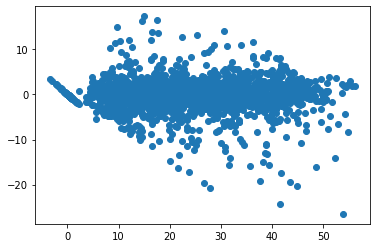

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

array([2.29429700e-01, 3.20673698e-01, 1.64171005e-01, 8.48103539e-03,
       3.73729579e-02, 1.54636015e-01, 2.04451456e-02, 1.85834996e-02,
       1.04725446e-06, 8.78372630e-05, 6.73428821e-04, 3.36342035e-04,
       4.95153707e-04, 2.37798977e-03, 8.07630555e-04, 2.13672164e-03,
       2.02488290e-04, 1.82409295e-03, 8.77718200e-03, 6.18075825e-04,
       9.61380320e-05, 9.09453617e-04, 4.70657980e-04, 6.37473130e-04,
       5.25061911e-04, 1.05814412e-03, 9.24531059e-04, 1.12714459e-02,
       1.57494186e-04, 1.02695464e-03, 4.69749633e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.34044366e-06, 0.00000000e+00,
       9.40201627e-04, 9.20451813e-03, 3.74999241e-04, 8.92946385e-06,
       4.75862744e-05, 1.64048864e-04])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.23
1,temperature,0.32
2,humidity,0.16
3,visibility,0.01
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.23
2,humidity,0.16
5,functioning_day,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
3,visibility,0.01
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

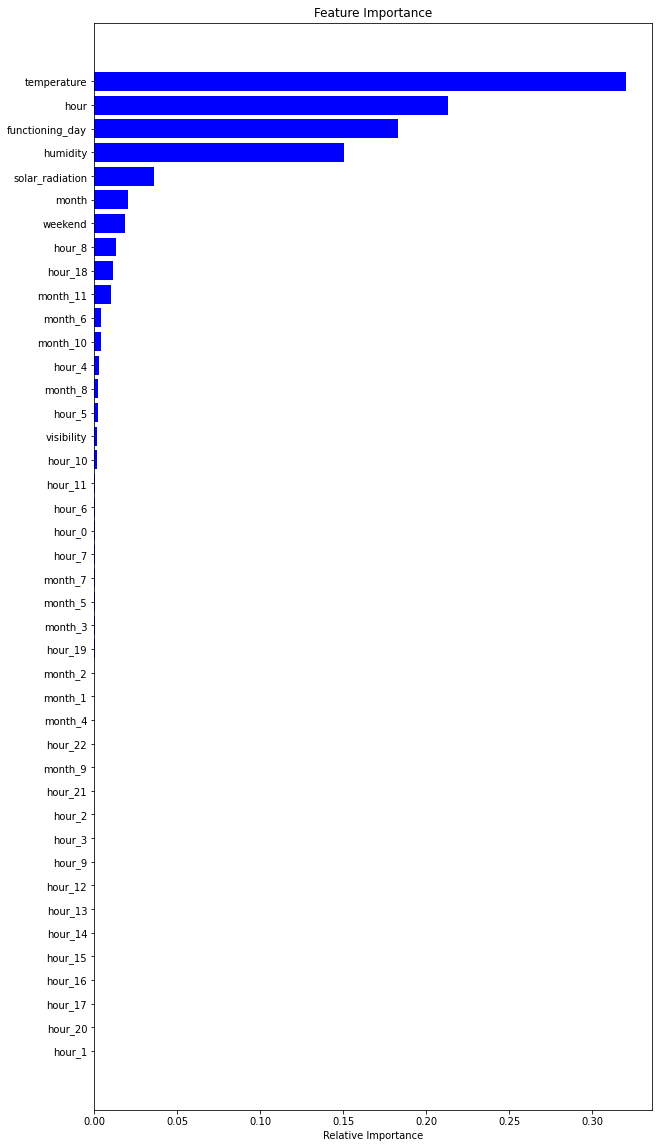

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **8. Final Verdict**

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R square is calculated by replacing the calculated prediction with the mean by dividing the sum of the squared prediction error by the total sum of the squares. The R Square worth reaches from 0 to 1, and a higher worth shows that the forecast and genuine worth are all the more firmly adjusted.


The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count. 

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Random Forest model because, first and foremost, I need a better prediction for the number of rented bikes, and time is not a constraint because the data is different from that of Zomato or Uber, where real-time booking must be completed more quickly. As a result, various linear models, decision trees, Random Forest, and Gradient Boost techniques were used to improve accuracy. I would like to compare their evaluation metrics, which are provided here.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

Training set                                             \
                             Model    MAE     MSE   RMSE R2_score Adjusted R2   
0               Linear regression   4.630  37.500  6.120    0.760        0.75   
1                Lasso regression   6.790  83.870  9.160    0.460        0.45   
2                Ridge regression   4.632  37.499  6.124    0.757        0.75   
3          Elastic net regression   5.740  57.470  7.580    0.630        0.62   
4        Dicision tree regression   4.526  39.607  6.293    0.744        0.74   
5        Random forest regression   0.820   1.810  1.350    0.990        0.99   
6    Gradient boosting regression   2.854  16.313  4.039    0.894        0.89   
7  Gradient Boosting gridsearchcv   1.760   7.561  2.750    0.951        0.95   

                          Test set                                             
                             Model    MAE     MSE   RMSE R2_score Adjusted R2  
0               Linear regression   4.780  39.750  6.310    0.750        0.74  
1                Lasso regression   6.944  85.679  9.256    0.453        0.44  
2                Ridge regression   4.780  39.752  6.305    0.746        0.74  
3      Elastic net regression Test  5.860  58.490  7.650    0.630        0.62  
4        Dicision tree regression   4.830  45.820  6.770    0.710        0.70  
5        Random forest regression   2.170  12.240  3.500    0.920        0.92  
6    Gradient boosting regression   3.071  18.088  4.253    0.885        0.88  
7  Gradient Boosting gridsearchcv   2.220  12.233  3.498    0.922        0.92

For the following reasons, I would choose Random Forest.
* One of the best R2 scores for the Test Set (0.92) and the Training Set (0.99)
* Test RMSE and training RMSE were the lowest.
* Test MAE and Training MAE are the lowest.
* A single model that can be used on both business days and weekends.
* Lowest Overfit (the Train RMSE is more comparable to the Test RMSE).
* Lesser opportunity to prepare because of a lesser number of elements.
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.0 MB/s 


In [ ]:
# package used to calculate Shap values
import shap 

# Create object that can calculate shap values
explainer = shap.Explainer(rf_model)

# Calculate Shap values
shap_values = explainer(X_test)

A force plot is one way to show SHAP values visually. These provide us with information comparable to that of a waterfall plot depicting the contribution of the geological features and their relationship to one another in a straight line. Assuming one worth of builds res will pack. As you can see, our starting point is the same, which is -1.94.

Individual predictions can be easily interpreted using force and waterfall plots. We need to combine the SHAP values to comprehend how our model generally makes predictions. Using a decision plot is one way to accomplish this. The code that was used to generate the decision plot for the first ten abalones is shown above.

The plot has ten lines, one for each abalone, as can be seen. They all end with their final predicted number of rings and begin with the same base value of -1.94. The SHAP value for each feature indicates the movement on the x-axis as you ascend from that feature on the y-axis. In the end, this provides the same data as a waterfall plot, with the exception that we can now see it for multiple observations.

We can already observe some trends with only ten observations. For instance, some of the lines appear to zigzag at the chart's top. The prediction for these observations is positive (SHAP) for the shucked weight and negative (SHAP) for the shell weight and whole weight. To put it another way, the prediction is affected in different ways by these features. At the point when we take a gander at plot 5 — beeswarm, we will see that this is the situation for the model overall.

An issue with this outline is that we can't utilize it to picture all the SHAP values immediately. It will become too cluttered as the number of observations increases, making it difficult to comprehend the model's operation. We can only explain the SHAP values for a small number of observations.

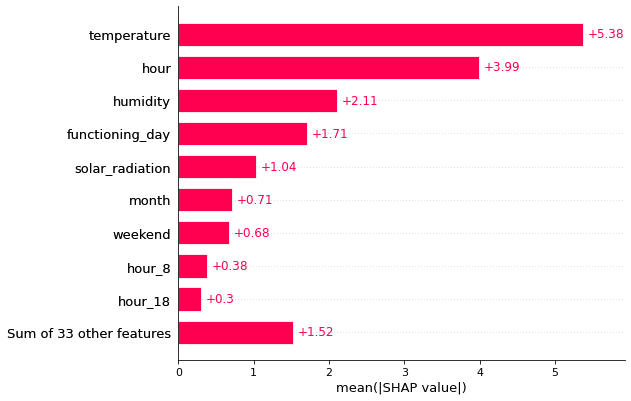

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

A mean SHAP plot is yet another approach to aggregating the values. We find the mean of all observations' absolute SHAP values for each feature. We accept the outright qualities as we don't maintain that positive and negative qualities should balance one another. The bar graph above is what we have at the end. We can see that the feature with the largest mean SHAP, shell weight, is represented by a single bar.

Positive and negative SHAP values for features with large mean SHAP values will typically be large. To put it another way, these are the characteristics that significantly influence the predictions made by the model. This plot can be used in the same way that a feature importance plot can be used. That is, to emphasize characteristics that are crucial to a model's predictions. The fact that it reveals nothing about the nature of the relationship between the target variable and features is a problem.

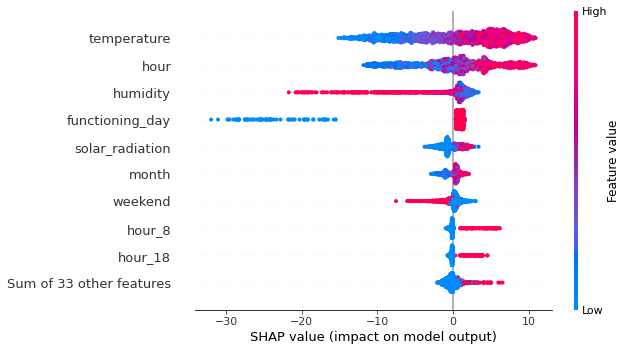

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

The beeswarm plot is our final grouping. As found in Figure, this is a plot of all the SHAP values. The y-axis features are used to group the values. For each gathering, the shade the not entirely settled by the worth of a similar element (for example higher element values are redder). The mean SHAP values determine the order of the features.

Some of the problems from the previous plots are addressed in this one. Dissimilar to the choice plot, we can plot every one of the perceptions yet has clear translations. It can be used to emphasize important relationships, like mean SHAP. We can also begin to comprehend these relationships' nature. Take, for instance, Day_1call_duration, where you can see that the SHAP values rise in tandem with the feature value.

##**9. Summary and Conclusion**

#### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

####**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***